In [1]:

%load_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np
import altair as alt
from pathlib import Path
import os
from pprint import pformat
import seaborn as sb

alt.data_transformers.enable("vegafusion")

FIG_SIZE = (20, 5)
# alt.renderers.enable("jupyter")

# Load Datasets

In [2]:

path_data = Path("../data")
train = pd.read_csv(path_data / "train.csv")
test = pd.read_csv(path_data / "test.csv")

print(train.shape, test.shape)

(140700, 20) (93800, 19)


In [19]:
print(train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140700 entries, 0 to 140699
Data columns (total 20 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   id                                     140700 non-null  int64  
 1   Name                                   140700 non-null  object 
 2   Gender                                 140700 non-null  object 
 3   Age                                    140700 non-null  float64
 4   City                                   140700 non-null  object 
 5   Working Professional or Student        140700 non-null  object 
 6   Profession                             104070 non-null  object 
 7   Academic Pressure                      27897 non-null   float64
 8   Work Pressure                          112782 non-null  float64
 9   CGPA                                   27898 non-null   float64
 10  Study Satisfaction                     27897 non-null   

In [18]:
print(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93800 entries, 0 to 93799
Data columns (total 19 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     93800 non-null  int64  
 1   Name                                   93800 non-null  object 
 2   Gender                                 93800 non-null  object 
 3   Age                                    93800 non-null  float64
 4   City                                   93800 non-null  object 
 5   Working Professional or Student        93800 non-null  object 
 6   Profession                             69168 non-null  object 
 7   Academic Pressure                      18767 non-null  float64
 8   Work Pressure                          75022 non-null  float64
 9   CGPA                                   18766 non-null  float64
 10  Study Satisfaction                     18767 non-null  float64
 11  Jo

In [20]:
train.head(3)

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,0,Aaradhya,Female,49.0,Ludhiana,Working Professional,Chef,NaN,5.0,NaN,NaN,2.0,More than 8 hours,Healthy,BHM,No,1.0,2.0,No,0
1,1,Vivan,Male,26.0,Varanasi,Working Professional,Teacher,NaN,4.0,NaN,NaN,3.0,Less than 5 hours,Unhealthy,LLB,Yes,7.0,3.0,No,1
2,2,Yuvraj,Male,33.0,Visakhapatnam,Student,NaN,5.0,NaN,8.97,2.0,NaN,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1


In [21]:
test.head(3)

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness
0,140700,Shivam,Male,53.0,Visakhapatnam,Working Professional,Judge,NaN,2.0,NaN,NaN,5.0,Less than 5 hours,Moderate,LLB,No,9.0,3.0,Yes
1,140701,Sanya,Female,58.0,Kolkata,Working Professional,Educational Consultant,NaN,2.0,NaN,NaN,4.0,Less than 5 hours,Moderate,B.Ed,No,6.0,4.0,No
2,140702,Yash,Male,53.0,Jaipur,Working Professional,Teacher,NaN,4.0,NaN,NaN,1.0,7-8 hours,Moderate,B.Arch,Yes,12.0,4.0,No


### nan-values relative to dataset size.
- probably because of logical reasoning, e.g., a full-time student without a job has 0 work pressure or a full time worker has 0 pressure in studies. basically if there are no real values missing there should be 20% academics and 80 workers (expect for people where both is NaN, but if both is NaN it could also point to pressure from other life areas...)

In [ ]:
train.isna().sum().div(train.shape[0]).mul(100).round(2)

id                                        0.00
Name                                      0.00
Gender                                    0.00
Age                                       0.00
City                                      0.00
Working Professional or Student           0.00
Profession                               26.03
Academic Pressure                        80.17
Work Pressure                            19.84
CGPA                                     80.17
Study Satisfaction                       80.17
Job Satisfaction                         19.84
Sleep Duration                            0.00
Dietary Habits                            0.00
Degree                                    0.00
Have you ever had suicidal thoughts ?     0.00
Work/Study Hours                          0.00
Financial Stress                          0.00
Family History of Mental Illness          0.00
Depression                                0.00
dtype: float64

In [26]:
test.isna().sum().div(train.shape[0]).mul(100).round(2)

id                                        0.00
Name                                      0.00
Gender                                    0.00
Age                                       0.00
City                                      0.00
Working Professional or Student           0.00
Profession                               17.51
Academic Pressure                        53.33
Work Pressure                            13.35
CGPA                                     53.33
Study Satisfaction                       53.33
Job Satisfaction                         13.34
Sleep Duration                            0.00
Dietary Habits                            0.00
Degree                                    0.00
Have you ever had suicidal thoughts ?     0.00
Work/Study Hours                          0.00
Financial Stress                          0.00
Family History of Mental Illness          0.00
dtype: float64

In [28]:
test.select_dtypes(exclude="object").describe()

,id,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Work/Study Hours,Financial Stress
count,93800.000000,93800.000000,18767.000000,75022.000000,18766.000000,18767.000000,75026.00000,93800.000000,93800.000000
mean,187599.500000,40.321685,3.158576,3.011797,7.674016,2.939522,2.96092,6.247335,2.978763
std,27077.871962,12.393480,1.386666,1.403563,1.465056,1.374242,1.41071,3.858191,1.414604
min,140700.000000,18.000000,1.000000,1.000000,5.030000,1.000000,1.00000,0.000000,1.000000
25%,164149.750000,29.000000,2.000000,2.000000,6.330000,2.000000,2.00000,3.000000,2.000000
50%,187599.500000,42.000000,3.000000,3.000000,7.800000,3.000000,3.00000,6.000000,3.000000
75%,211049.250000,51.000000,4.000000,4.000000,8.940000,4.000000,4.00000,10.000000,4.000000
max,234499.000000,60.000000,5.000000,5.000000,10.000000,5.000000,5.00000,12.000000,5.000000


In [29]:
train.select_dtypes(exclude="object").describe()

,id,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Work/Study Hours,Financial Stress,Depression
count,140700.000000,140700.000000,27897.000000,112782.000000,27898.000000,27897.000000,112790.000000,140700.000000,140696.000000,140700.000000
mean,70349.500000,40.388621,3.142273,2.998998,7.658636,2.944940,2.974404,6.252679,2.988983,0.181713
std,40616.735775,12.384099,1.380457,1.405771,1.464466,1.360197,1.416078,3.853615,1.413633,0.385609
min,0.000000,18.000000,1.000000,1.000000,5.030000,1.000000,1.000000,0.000000,1.000000,0.000000
25%,35174.750000,29.000000,2.000000,2.000000,6.290000,2.000000,2.000000,3.000000,2.000000,0.000000
50%,70349.500000,42.000000,3.000000,3.000000,7.770000,3.000000,3.000000,6.000000,3.000000,0.000000
75%,105524.250000,51.000000,4.000000,4.000000,8.920000,4.000000,4.000000,10.000000,4.000000,0.000000
max,140699.000000,60.000000,5.000000,5.000000,10.000000,5.000000,5.000000,12.000000,5.000000,1.000000


### Observations
1. age: 18 to 60
2. Depression is an not the status quo -> 20%
3. Average Person is content with their job

## Check Object Column Types
- Analyze Value Ranges: How many unique values? How are the distribution?

### Observations
1. Cities Column: High difference in category 98 Values -> Maybe add additional information like country or continent.
2. Profession Type: 2 Values, Student or Worker -> OK
3. Professions: 64 values: A lot of Abbreviations
4. Sleep Duration: 36 Different Types, could be compressed.
5. Dietary Habits: 23 Different Habits + dirty values.
6. Dirty Values, 115 Degrees, probably could be aggregated.
7. Suicidal Thought: 2 Categorical Values -> OK
8. Family History of Mental Illness: 2 Categorical Values -> OK

In [37]:
for col_name in train.select_dtypes(include="object").columns:
    # skip columns where value ranges don't matter.
    if col_name in ["Name"]:
        continue
    print(col_name, train[col_name].nunique(),  train[col_name].unique())
    

Gender 2 ['Female' 'Male']
City 98 ['Ludhiana' 'Varanasi' 'Visakhapatnam' 'Mumbai' 'Kanpur' 'Ahmedabad'
 'Thane' 'Nashik' 'Bangalore' 'Patna' 'Rajkot' 'Jaipur' 'Pune' 'Lucknow'
 'Meerut' 'Agra' 'Surat' 'Faridabad' 'Hyderabad' 'Srinagar' 'Ghaziabad'
 'Kolkata' 'Chennai' 'Kalyan' 'Nagpur' 'Vadodara' 'Vasai-Virar' 'Delhi'
 'Bhopal' 'Indore' 'Ishanabad' 'Vidhi' 'Ayush' 'Gurgaon' 'Krishna'
 'Aishwarya' 'Keshav' 'Harsha' 'Nalini' 'Aditya' 'Malyansh' 'Raghavendra'
 'Saanvi' 'M.Tech' 'Bhavna' 'Less Delhi' 'Nandini' 'M.Com' 'Plata'
 'Atharv' 'Pratyush' 'City' '3.0' 'Less than 5 Kalyan' 'MCA' 'Mira'
 'Moreadhyay' 'Morena' 'Ishkarsh' 'Kashk' 'Mihir' 'Vidya' 'Tolkata' 'Anvi'
 'Krinda' 'Ayansh' 'Shrey' 'Ivaan' 'Vaanya' 'Gaurav' 'Harsh' 'Reyansh'
 'Kashish' 'Kibara' 'Vaishnavi' 'Chhavi' 'Parth' 'Mahi' 'Tushar' 'MSc'
 'No' 'Rashi' 'ME' 'Molkata' 'Researcher' 'Kagan' 'Armaan' 'Ithal'
 'Nalyan' 'Dhruv' 'Galesabad' 'Itheg' 'Aaradhya' 'Pooja' 'Khushi'
 'Khaziabad' 'Jhanvi' 'Unirar']
Working Professional 

In [38]:
for col_name in test.select_dtypes(include="object").columns:
    # skip columns where value ranges don't matter.
    if col_name in ["Name"]:
        continue
    print(col_name, train[col_name].nunique(),  train[col_name].unique())
    

Gender 2 ['Female' 'Male']
City 98 ['Ludhiana' 'Varanasi' 'Visakhapatnam' 'Mumbai' 'Kanpur' 'Ahmedabad'
 'Thane' 'Nashik' 'Bangalore' 'Patna' 'Rajkot' 'Jaipur' 'Pune' 'Lucknow'
 'Meerut' 'Agra' 'Surat' 'Faridabad' 'Hyderabad' 'Srinagar' 'Ghaziabad'
 'Kolkata' 'Chennai' 'Kalyan' 'Nagpur' 'Vadodara' 'Vasai-Virar' 'Delhi'
 'Bhopal' 'Indore' 'Ishanabad' 'Vidhi' 'Ayush' 'Gurgaon' 'Krishna'
 'Aishwarya' 'Keshav' 'Harsha' 'Nalini' 'Aditya' 'Malyansh' 'Raghavendra'
 'Saanvi' 'M.Tech' 'Bhavna' 'Less Delhi' 'Nandini' 'M.Com' 'Plata'
 'Atharv' 'Pratyush' 'City' '3.0' 'Less than 5 Kalyan' 'MCA' 'Mira'
 'Moreadhyay' 'Morena' 'Ishkarsh' 'Kashk' 'Mihir' 'Vidya' 'Tolkata' 'Anvi'
 'Krinda' 'Ayansh' 'Shrey' 'Ivaan' 'Vaanya' 'Gaurav' 'Harsh' 'Reyansh'
 'Kashish' 'Kibara' 'Vaishnavi' 'Chhavi' 'Parth' 'Mahi' 'Tushar' 'MSc'
 'No' 'Rashi' 'ME' 'Molkata' 'Researcher' 'Kagan' 'Armaan' 'Ithal'
 'Nalyan' 'Dhruv' 'Galesabad' 'Itheg' 'Aaradhya' 'Pooja' 'Khushi'
 'Khaziabad' 'Jhanvi' 'Unirar']
Working Professional 

### Observation
- Testset has the same amount of unique values for each column with dtype object

In [ ]:

for col_name in test.select_dtypes(include="object").columns:
    # skip columns where value ranges don't matter.
    if col_name in ["Name"]:
        continue
    
    differences = set(test[col_name].unique()).symmetric_difference(train[col_name].unique())
    common_vals = len(set(test[col_name].unique()).intersection(train[col_name].unique()))
    differences_str = " ".join(differences)
    print(f"{col_name.center(20, '-')}")
    print(f"N-Different Values:{len(differences):^5} Equal Values: {common_vals:^5}")
    print(f"{pformat(differences_str, width=100)}\n")
    
    

-------Gender-------
N-Different Values:  0   Equal Values:   2  
''

--------City--------
N-Different Values: 82   Equal Values:  42  
('Aaradhya ME Aishwarya Gaurav Nalyan Ishanabad Shrey Sara Khushi Chemist Mhopal Unaly Ishkarsh '
 'Hrithik Kashish Malyansh Ithal San Vasai-Virar Saurav Dhruv 3.0 Siddhesh Vaanya Lawyer Malyan '
 'Gurgaon Khaziabad Krinda Tolkata Abhinav No.12 Thani Ayush Kibara Itheg Aditi Less than 5 Kalyan '
 'Kagan Moreadhyay Anvi Morena Ivaan Kashk Mira Is Kanpur Ayansh Galesabad Reyansh Rolkata Plata '
 'Harsh Golkata More Delhi Rashi Harsha Researcher Chhavi Less than 5 hours Mihir Atharv M.Tech '
 'Armaan M.Com Ghopal Molkata Mahi Unirar Raghavendra Nandini Vikram Tushar MCA MSc Krishna Ira '
 'Vaikot Avni Leela Aditya Pratham Pooja Jhanvi')

Working Professional or Student
N-Different Values:  0   Equal Values:   2  
''

-----Profession-----
N-Different Values: 34   Equal Values:  48  
('B.Pharm ME City Manager MBBS BCA B.Com No Surgeon FamilyVirar 3M Pranav 

# Correlations

In [87]:
train.head(3)

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,0,Aaradhya,Female,49.0,Ludhiana,Working Professional,Chef,NaN,5.0,NaN,NaN,2.0,More than 8 hours,Healthy,BHM,No,1.0,2.0,No,0
1,1,Vivan,Male,26.0,Varanasi,Working Professional,Teacher,NaN,4.0,NaN,NaN,3.0,Less than 5 hours,Unhealthy,LLB,Yes,7.0,3.0,No,1
2,2,Yuvraj,Male,33.0,Visakhapatnam,Student,NaN,5.0,NaN,8.97,2.0,NaN,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1


In [89]:
train.select_dtypes(exclude="object").corr()

,id,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Work/Study Hours,Financial Stress,Depression
id,1.000000,0.001850,0.005597,0.003086,-0.011869,0.007824,0.002774,0.002359,-0.000340,0.003944
Age,0.001850,1.000000,-0.075956,-0.098924,0.005129,0.008862,0.030793,-0.118356,-0.083589,-0.564671
Academic Pressure,0.005597,-0.075956,1.000000,NaN,-0.025195,-0.112228,-1.000000,0.095650,0.152105,0.475037
Work Pressure,0.003086,-0.098924,NaN,1.000000,NaN,NaN,-0.036958,-0.002808,0.024412,0.216634
CGPA,-0.011869,0.005129,-0.025195,NaN,1.000000,-0.047078,1.000000,0.002875,0.006398,0.021729
Study Satisfaction,0.007824,0.008862,-0.112228,NaN,-0.047078,1.000000,-1.000000,-0.036934,-0.065001,-0.168014
Job Satisfaction,0.002774,0.030793,-1.000000,-0.036958,1.000000,-1.000000,1.000000,-0.029227,-0.029160,-0.168543
Work/Study Hours,0.002359,-0.118356,0.095650,-0.002808,0.002875,-0.036934,-0.029227,1.000000,0.036134,0.191746
Financial Stress,-0.000340,-0.083589,0.152105,0.024412,0.006398,-0.065001,-0.029160,0.036134,1.000000,0.227237
Depression,0.003944,-0.564671,0.475037,0.216634,0.021729,-0.168014,-0.168543,0.191746,0.227237,1.000000


### observation
- Strong Negative Correlation: Age, Study Satisfaction, job Satisfaction
- Strong Positve Correlation: Academic Pressoure, Financial Stress and Work Pressure

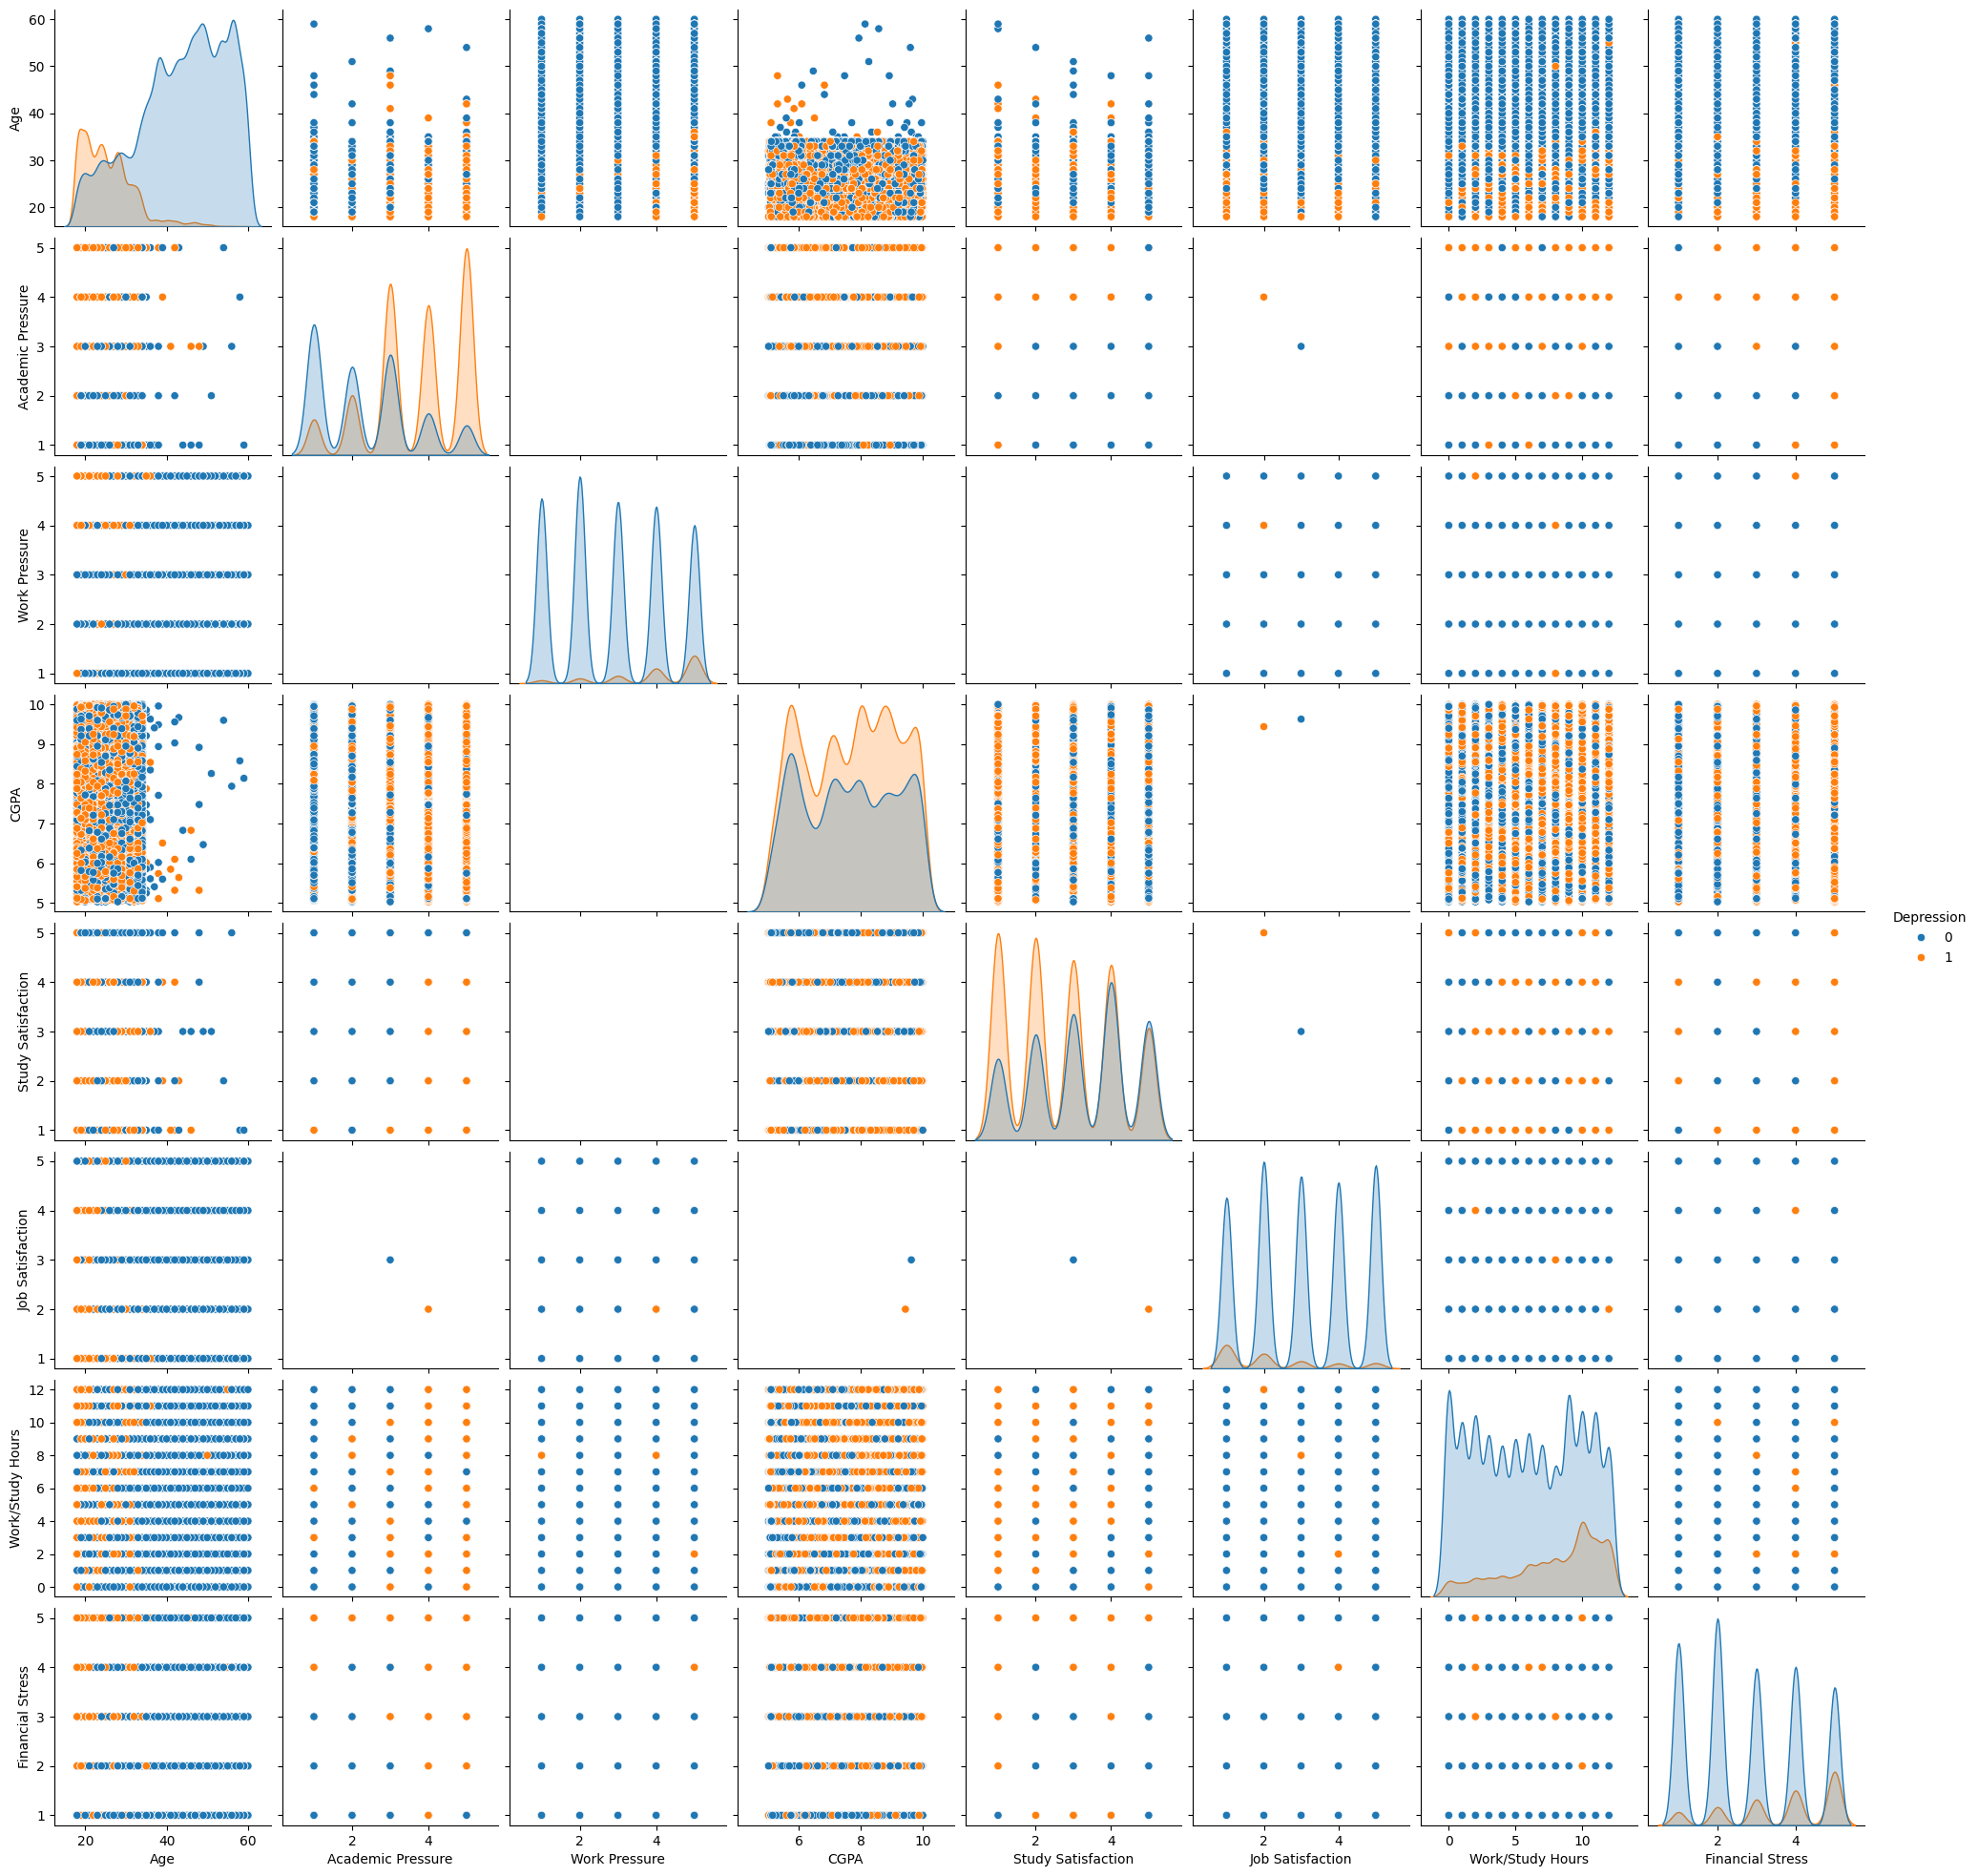

In [5]:
tmp_df = train.select_dtypes(exclude="object").drop(columns=["id"])

sb.pairplot(tmp_df, hue="Depression")

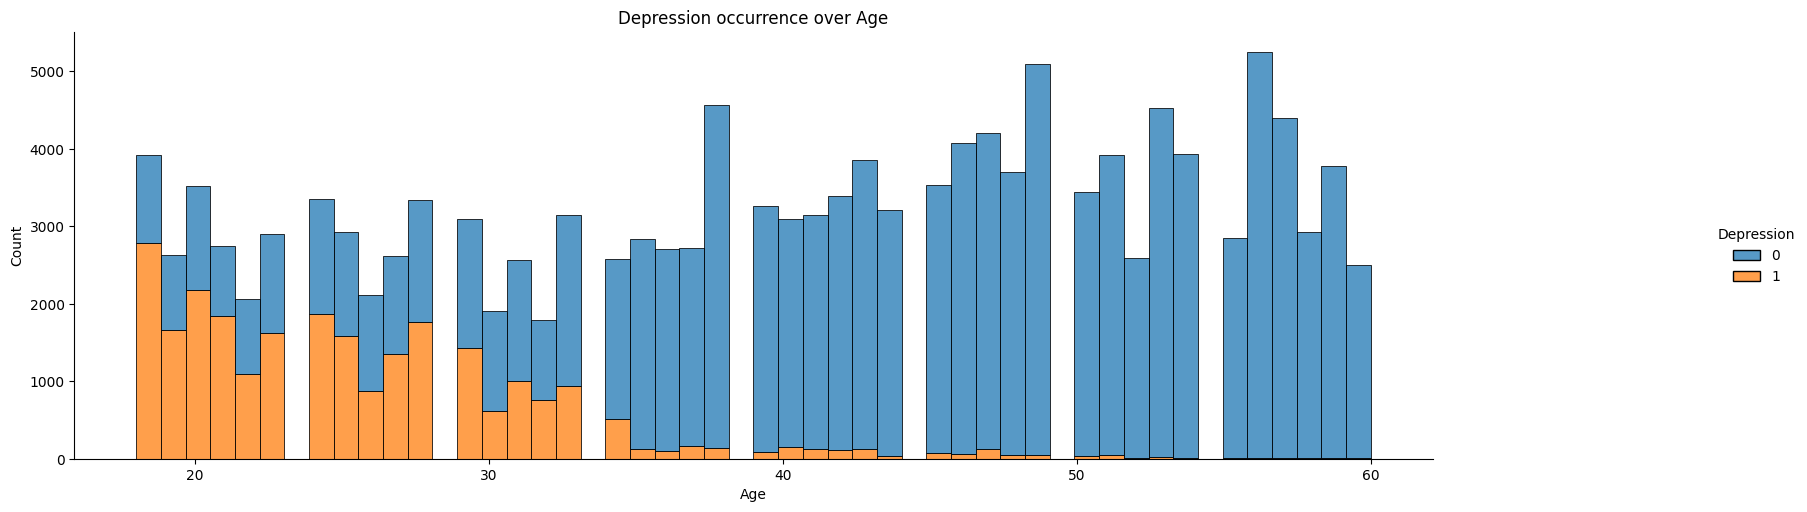

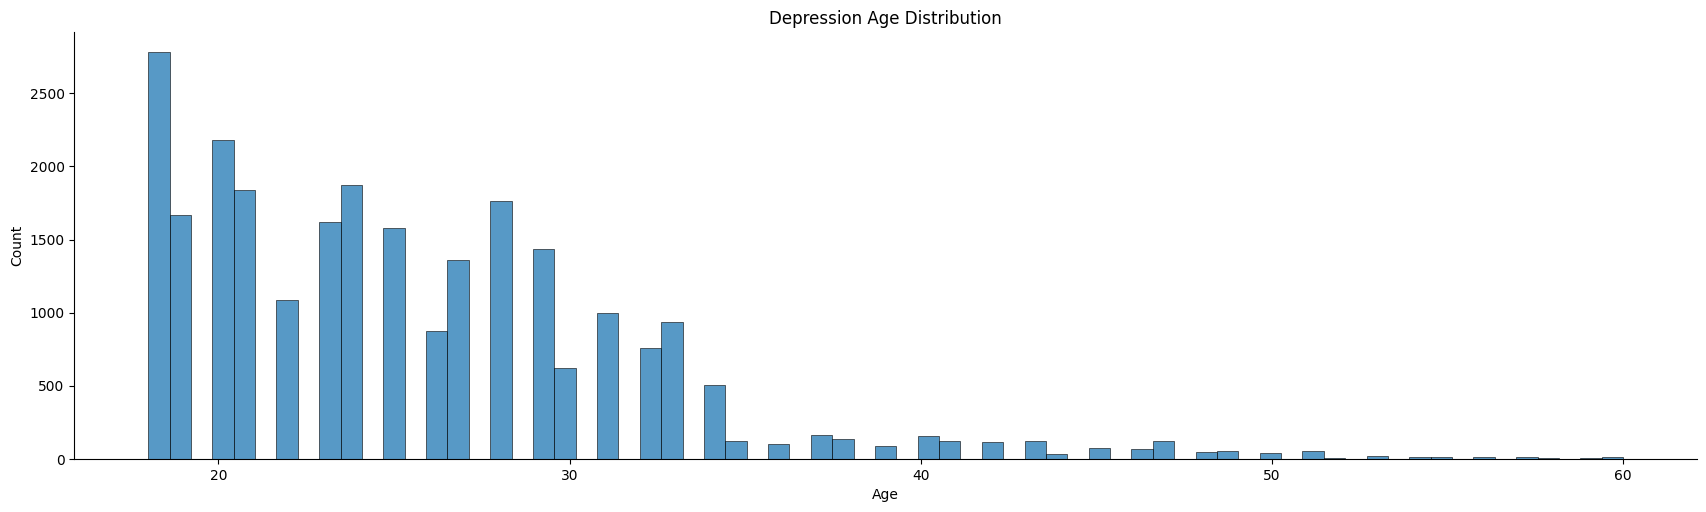

In [ ]:
import matplotlib.pyplot as plt

# Depression over age
sb.displot(tmp_df[["Age", "Depression"]], x="Age", hue="Depression", multiple="stack", kind="hist")
plt.title("Depression occurrence over Age")
plt.gcf().set_size_inches(FIG_SIZE)
plt.show()

# Depression only Distribution
sb.displot(tmp_df[["Age", "Depression"]].query("Depression == 1"), x="Age", kind="hist")
plt.title("Depression Age Distribution")
plt.gcf().set_size_inches(FIG_SIZE)
plt.show()

In [24]:
tmp_df[["Age", "Depression"]].query("Depression == 1").describe().T

,count,mean,std,min,25%,50%,75%,max
Age,25567.0,25.549145,6.489058,18.0,20.0,24.0,29.0,60.0
Depression,25567.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0


### In which age does the highest academic or work pressure occur?

In [26]:
train.head(3)

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,0,Aaradhya,Female,49.0,Ludhiana,Working Professional,Chef,NaN,5.0,NaN,NaN,2.0,More than 8 hours,Healthy,BHM,No,1.0,2.0,No,0
1,1,Vivan,Male,26.0,Varanasi,Working Professional,Teacher,NaN,4.0,NaN,NaN,3.0,Less than 5 hours,Unhealthy,LLB,Yes,7.0,3.0,No,1
2,2,Yuvraj,Male,33.0,Visakhapatnam,Student,NaN,5.0,NaN,8.97,2.0,NaN,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1


In [57]:
tmp_df = train.filter(regex="Pressure|Depression|Age")
tmp_df = tmp_df.rename(columns=dict(zip(tmp_df.columns, [x.replace(" ", "_") for x in tmp_df.columns])))

In [36]:
for col in tmp_df.columns:
    print(tmp_df[col].unique())

[nan  5.  2.  3.  4.  1.]
[ 5.  4. nan  1.  2.  3.]
[0 1]


In [ ]:
tmp_df.iloc[0, 0]

C:\Users\Nero\AppData\Local\Temp\ipykernel_29784\2253531870.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  tmp_df.iloc[0][0]


np.float64(nan)

In [53]:
# gibt es personen die aus beiden kategorien stress empfinden?
tmp_df[~tmp_df["Academic_Pressure"].isna() & ~tmp_df["Work_Pressure"].isna()]
# => d.h., es gibt entweder Vollzeitstudenten oder Vollzeitarbeitende ?

,Academic_Pressure,Work_Pressure,Depression


In [54]:
# gibt es NaN werde in beiden columns?
tmp_df[tmp_df["Academic_Pressure"].isna() & tmp_df["Work_Pressure"].isna()]
# würde es Sinn machen? => nur wenn man überhaupt keinen Stress aus diesen Kategorien empfindet.

,Academic_Pressure,Work_Pressure,Depression
15846,NaN,NaN,0
17549,NaN,NaN,0
34694,NaN,NaN,0
35612,NaN,NaN,1
57196,NaN,NaN,1
60348,NaN,NaN,0
70453,NaN,NaN,1
76104,NaN,NaN,1
85126,NaN,NaN,1
86606,NaN,NaN,1


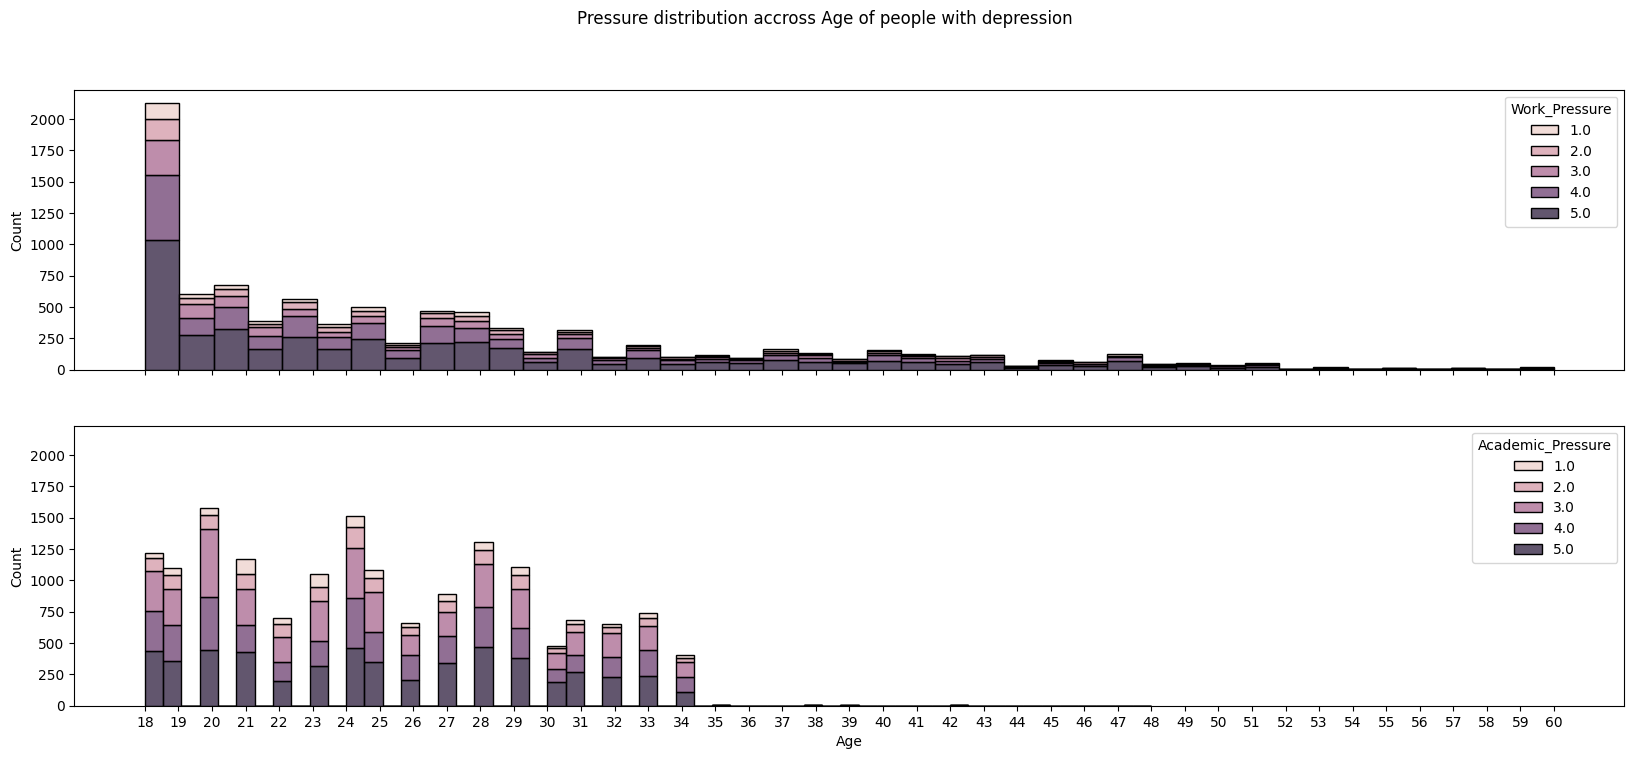

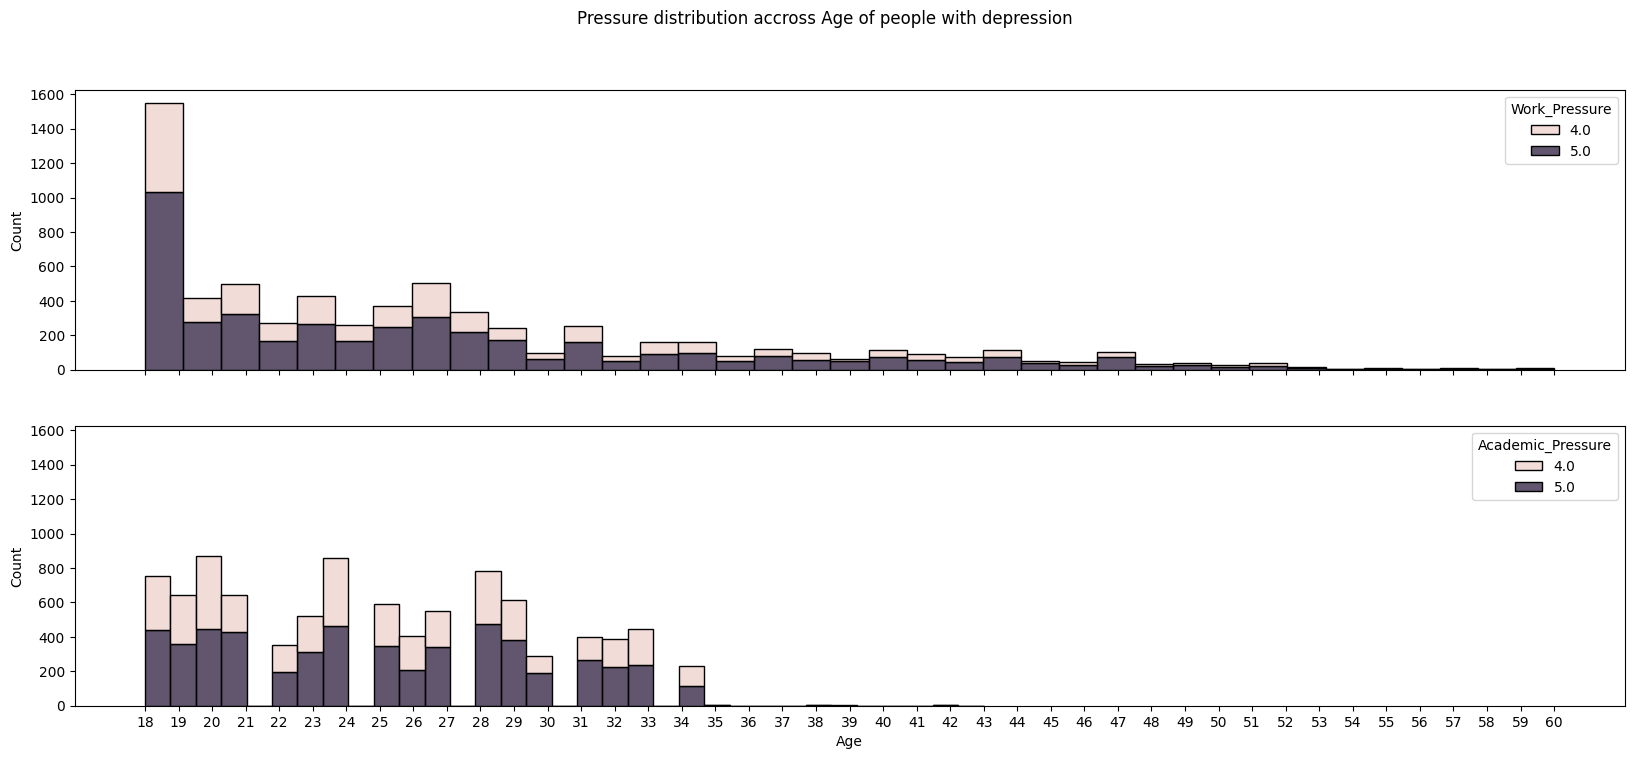

In [76]:
# all groups
fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(20, 8), sharex=True, sharey=True)
sb.histplot(tmp_df.query("Depression == 1"), x="Age", hue="Work_Pressure", multiple="stack", ax=axs[0])
sb.histplot(tmp_df.query("Depression == 1"), x="Age", hue="Academic_Pressure", multiple="stack", ax=axs[1])
plt.suptitle("Pressure distribution accross Age of people with depression")
plt.xticks(sorted(tmp_df["Age"].unique()))
plt.show()

# higher pressure
fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(20, 8), sharex=True, sharey=True)
sb.histplot(tmp_df.query("Depression == 1 and Work_Pressure > 3.0"), x="Age", hue="Work_Pressure", multiple="stack", ax=axs[0])
sb.histplot(tmp_df.query("Depression == 1 and Academic_Pressure > 3.0"), x="Age", hue="Academic_Pressure", multiple="stack", ax=axs[1])
plt.suptitle("Pressure distribution accross Age of people with depression")
plt.xticks(sorted(tmp_df["Age"].unique()))
plt.show()


### Observations
1. especially young people have high pressure and it decreases with the age for both pressure types (or maybe suicide?)

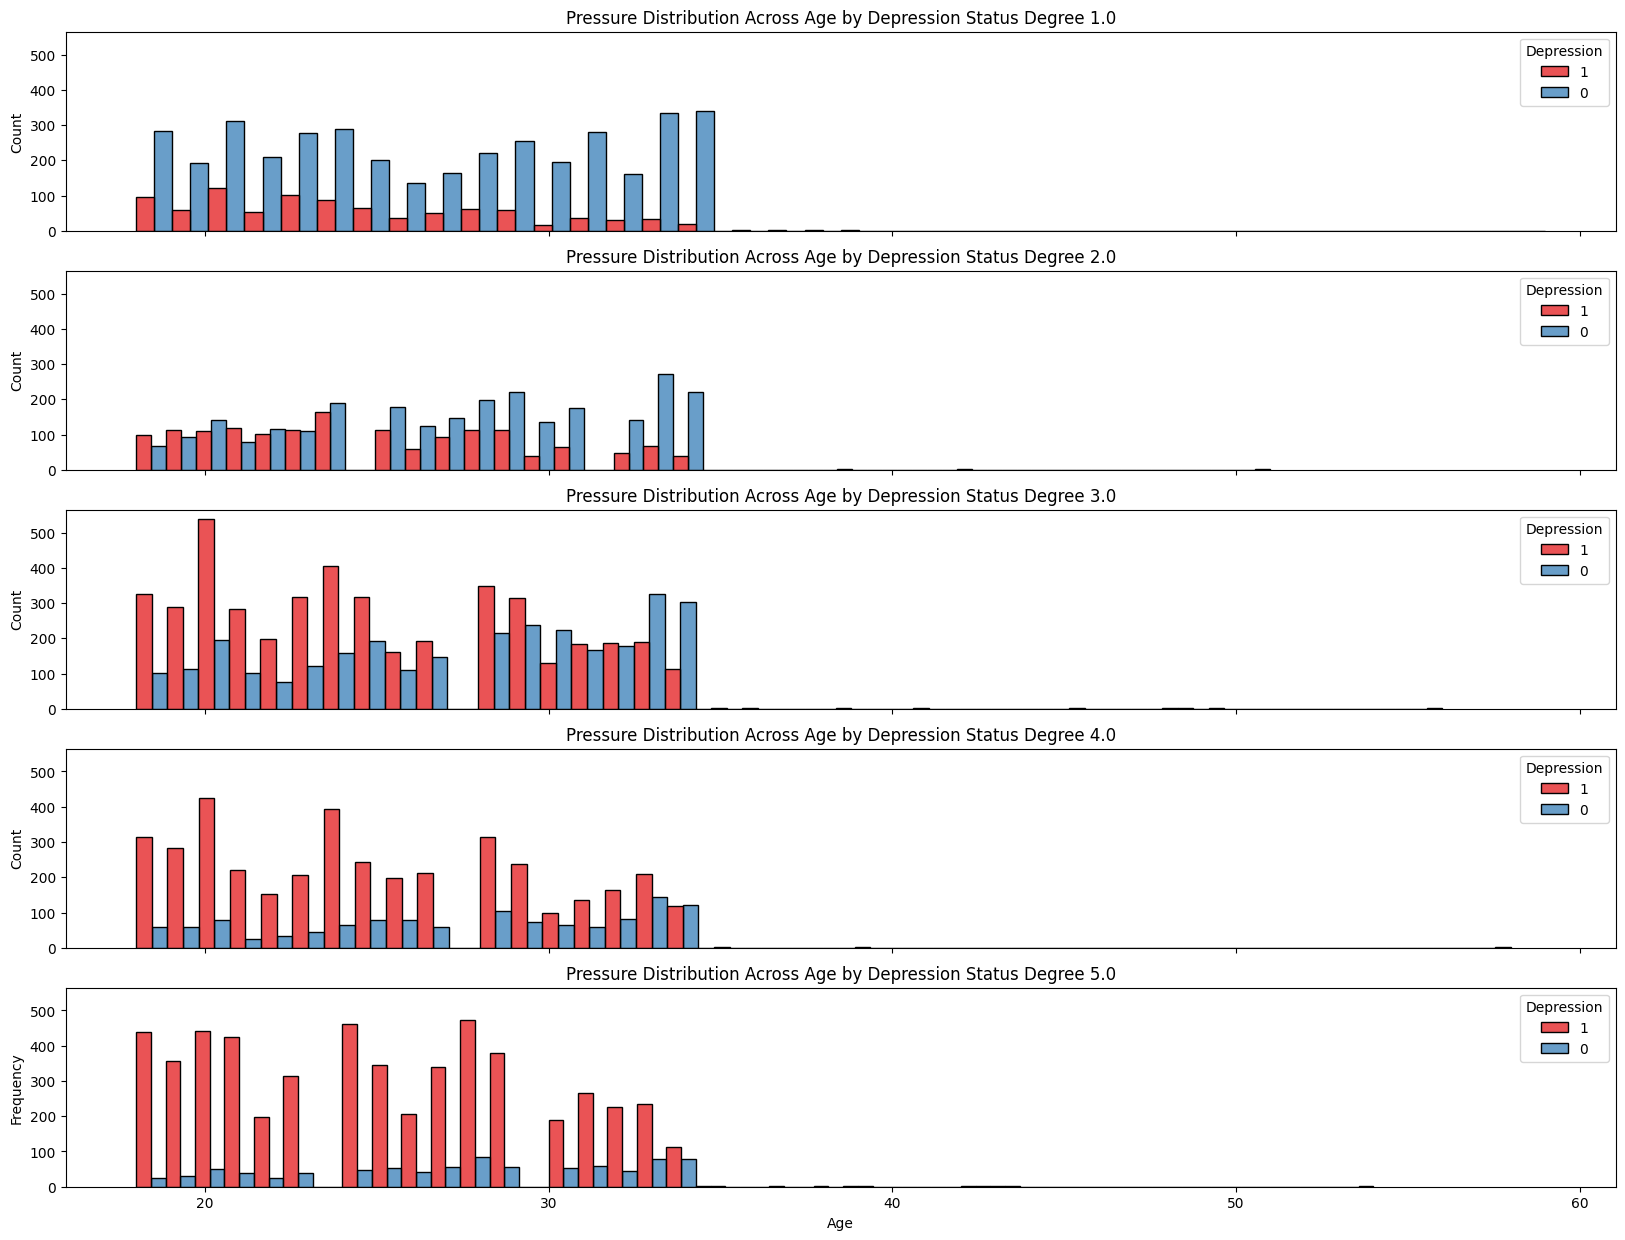

In [100]:
fig, axs = plt.subplots(nrows=5, ncols=1, figsize=(20, 15), sharex=True, sharey=True)
for i, degree in enumerate(sorted(tmp_df["Academic_Pressure"].unique()), -1):
    # print(type(degree), degree)
    if np.isnan(degree):
        continue
    
    # Plot the histogram with 'Depression' as a hue to create side-by-side bars for each age
    sb.histplot(data=tmp_df.query("Academic_Pressure == @degree"), x="Age", hue="Depression", multiple="dodge", 
                hue_order=[1, 0],  # Ensures "with depression" and "without depression" are in order
                palette="Set1",  # Choose a color palette for better visibility
                kde=False, ax=axs[i])

    # Customize plot labels and title
    plt.xlabel("Age")
    plt.ylabel("Frequency")
    axs[i].set_title(f"Pressure Distribution Across Age by Depression Status Degree {degree}")

    # Show plot
plt.show()

TypeError: Data source must be a DataFrame or Mapping, not <class 'pandas.core.groupby.generic.DataFrameGroupBy'>.

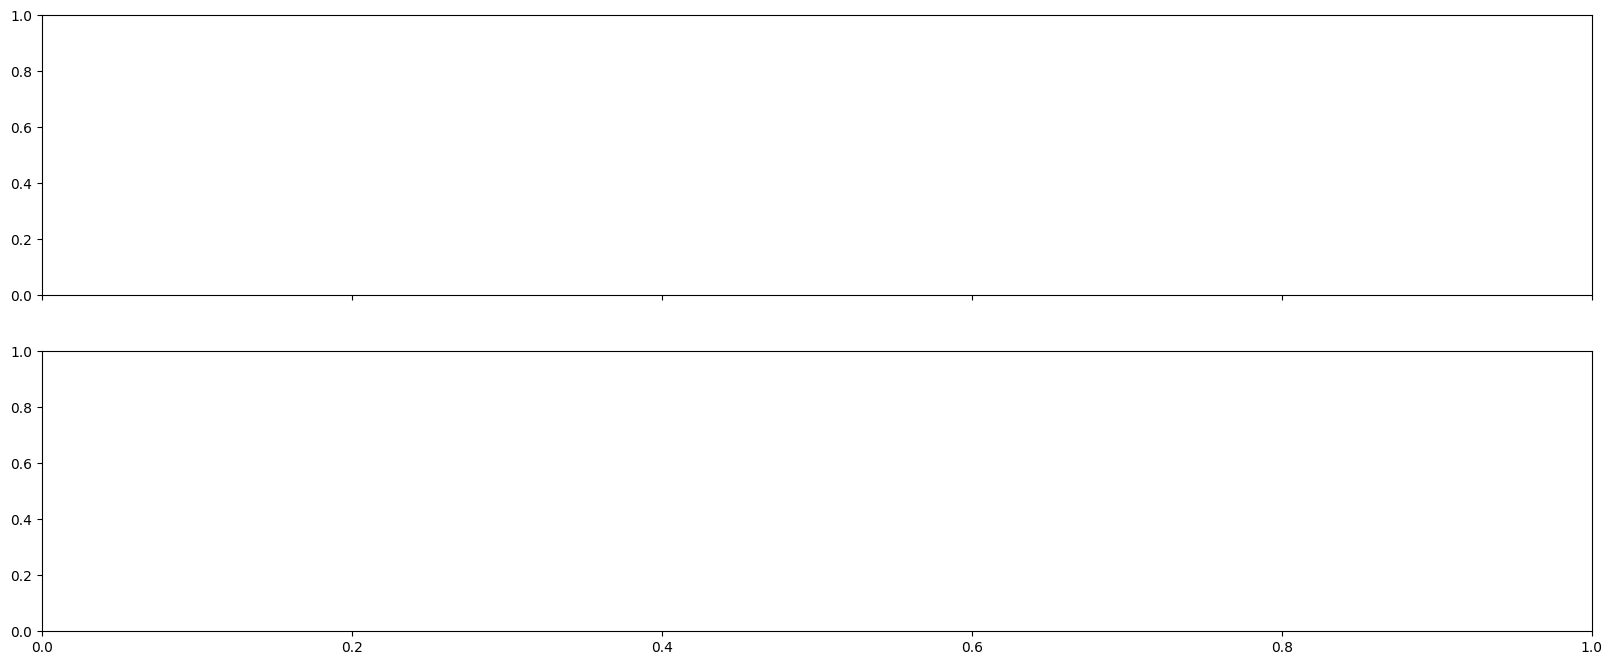

In [78]:
fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(20, 8), sharex=True, sharey=True)
sb.histplot(tmp_df.groupby("Depression"), x="Age", hue="Work_Pressure", multiple="stack", ax=axs[0])
sb.histplot(tmp_df.groupby("Depression"), x="Age", hue="Academic_Pressure", multiple="stack", ax=axs[1])
plt.suptitle("Pressure distribution accross Age of people WITHOUT depression")
plt.xticks(sorted(tmp_df["Age"].unique()))
plt.show()

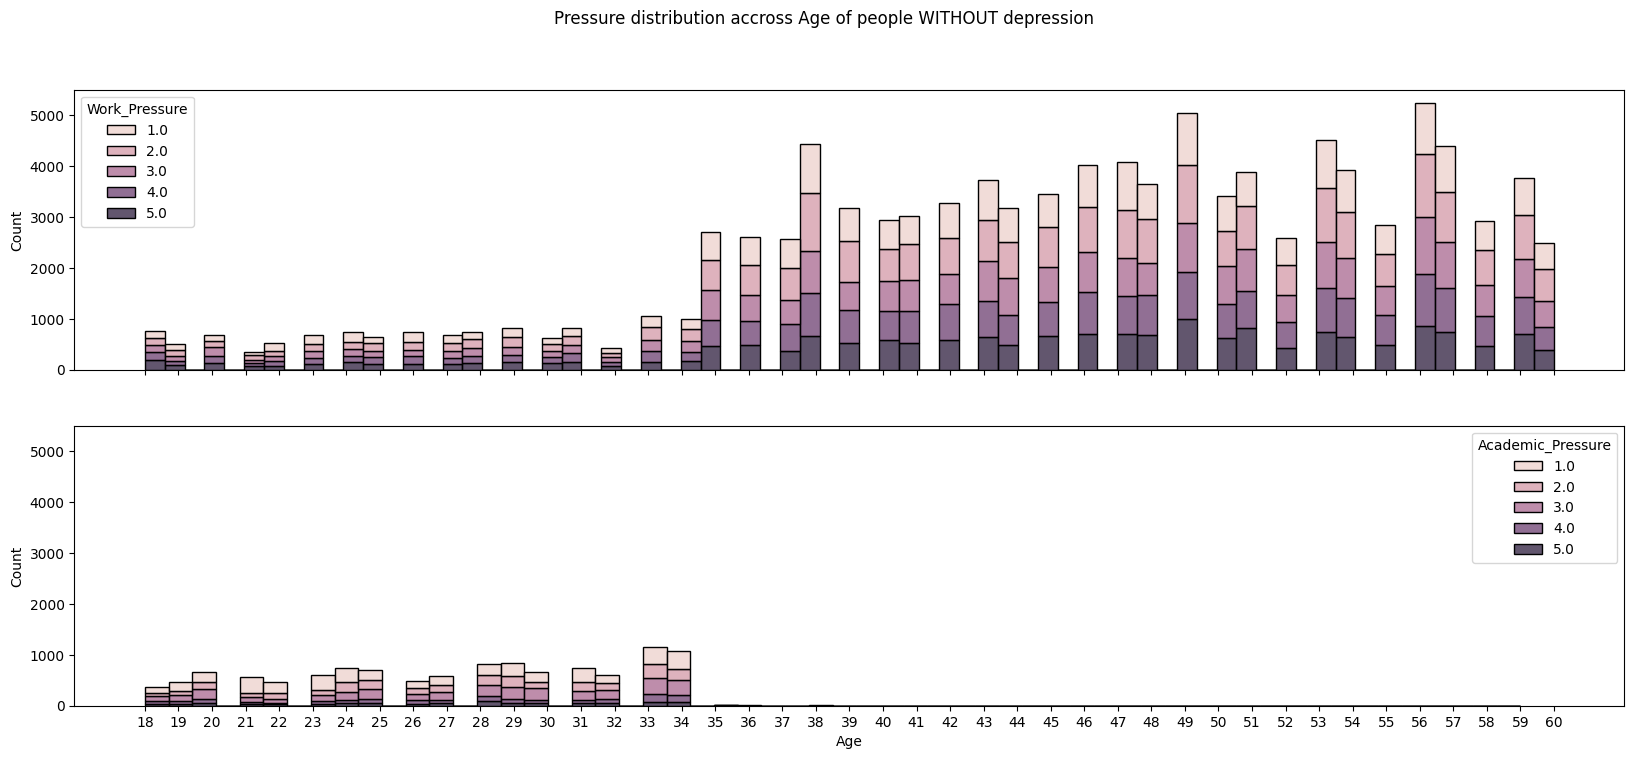

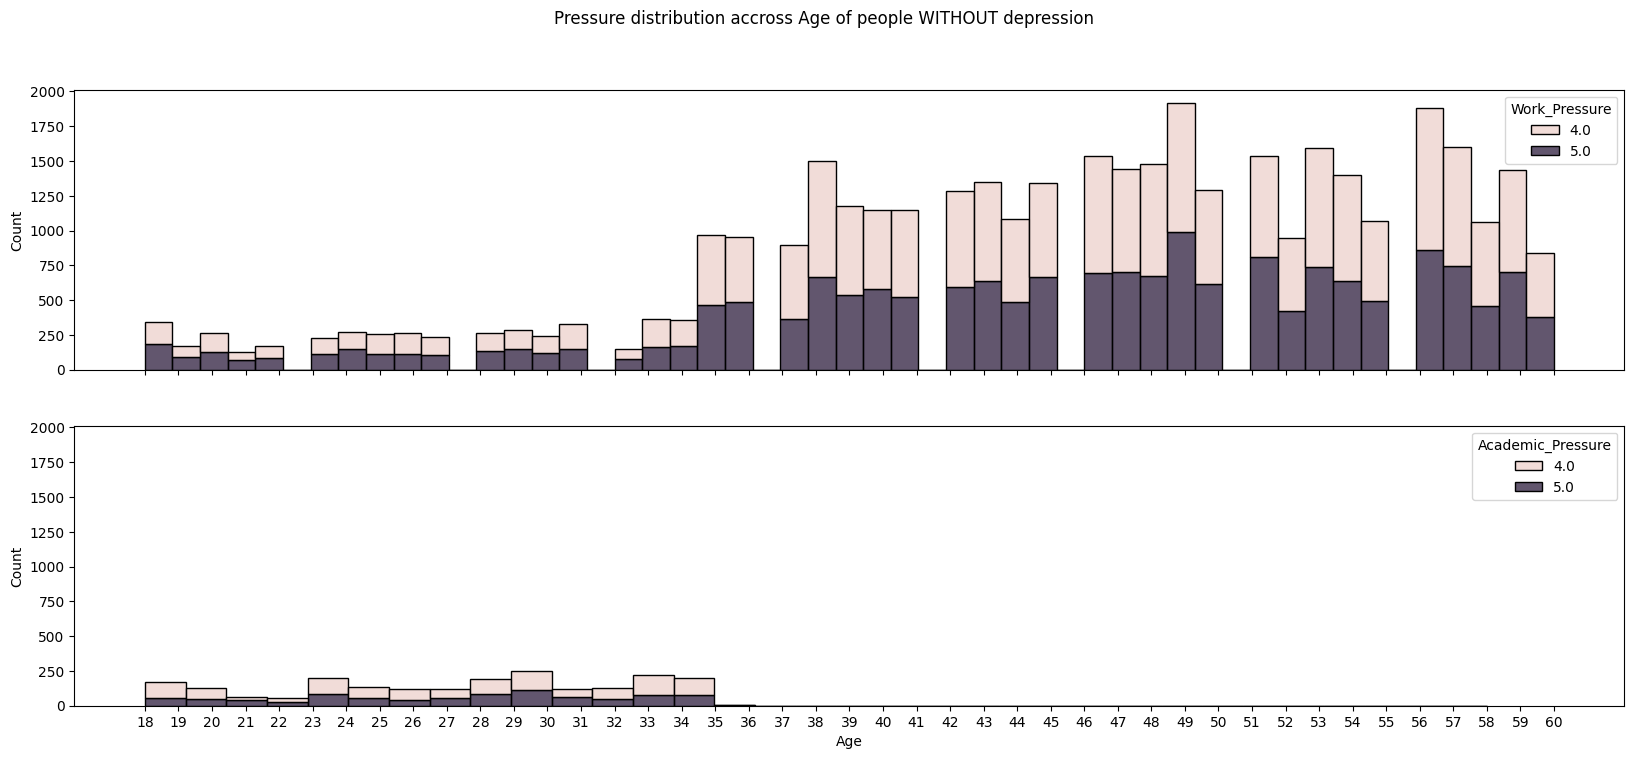

In [77]:
# same plots for people without depression
# all groups
fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(20, 8), sharex=True, sharey=True)
sb.histplot(tmp_df.query("Depression == 0"), x="Age", hue="Work_Pressure", multiple="stack", ax=axs[0])
sb.histplot(tmp_df.query("Depression == 0"), x="Age", hue="Academic_Pressure", multiple="stack", ax=axs[1])
plt.suptitle("Pressure distribution accross Age of people WITHOUT depression")
plt.xticks(sorted(tmp_df["Age"].unique()))
plt.show()

# higher pressure
fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(20, 8), sharex=True, sharey=True)
sb.histplot(tmp_df.query("Depression == 0 and Work_Pressure > 3.0"), x="Age", hue="Work_Pressure", multiple="stack", ax=axs[0])
sb.histplot(tmp_df.query("Depression == 0 and Academic_Pressure > 3.0"), x="Age", hue="Academic_Pressure", multiple="stack", ax=axs[1])
plt.suptitle("Pressure distribution accross Age of people WITHOUT depression")
plt.xticks(sorted(tmp_df["Age"].unique()))
plt.show()


# Which jobs have the highest Depression rate?

In [17]:
from lib.preprocess import *
import matplotlib.pyplot as plt

train_new = train.pipe(rename_columns).pipe(clean_profession_column)


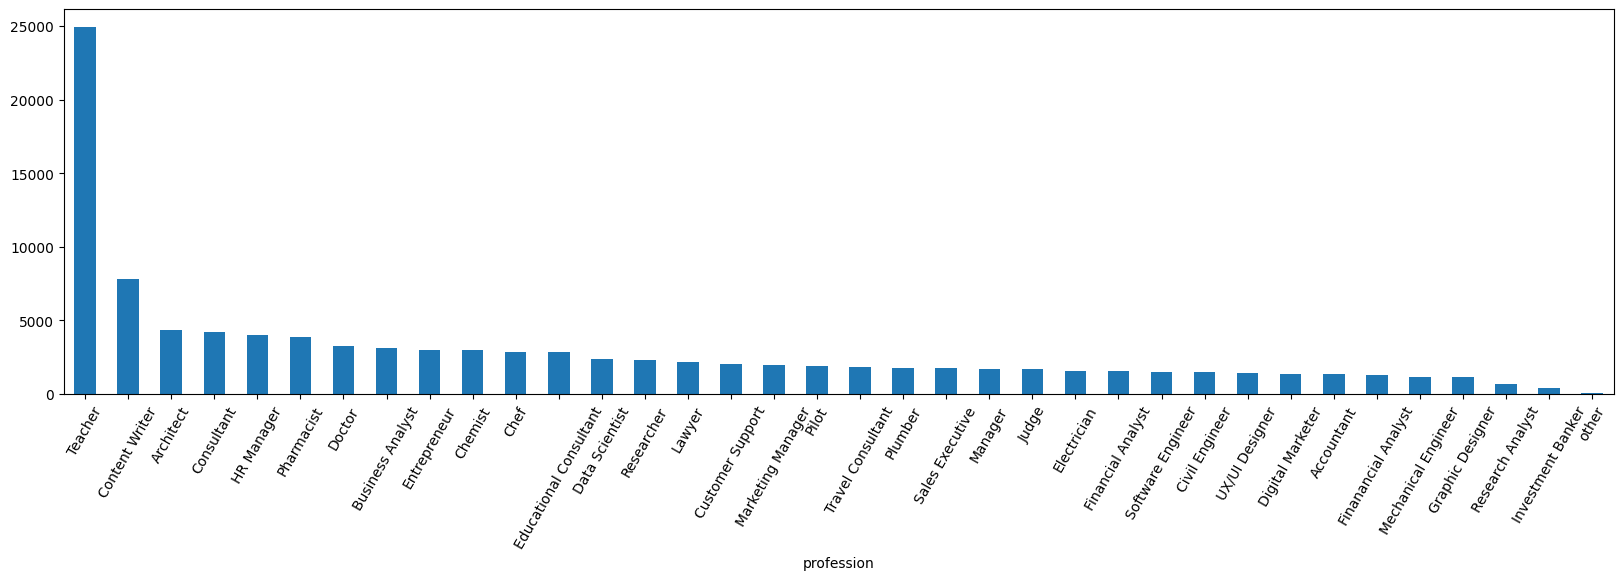

In [24]:
plt.figure(figsize=FIG_SIZE)
train_new["profession"].value_counts().plot(kind='bar')
plt.xticks(rotation=60)
plt.show()

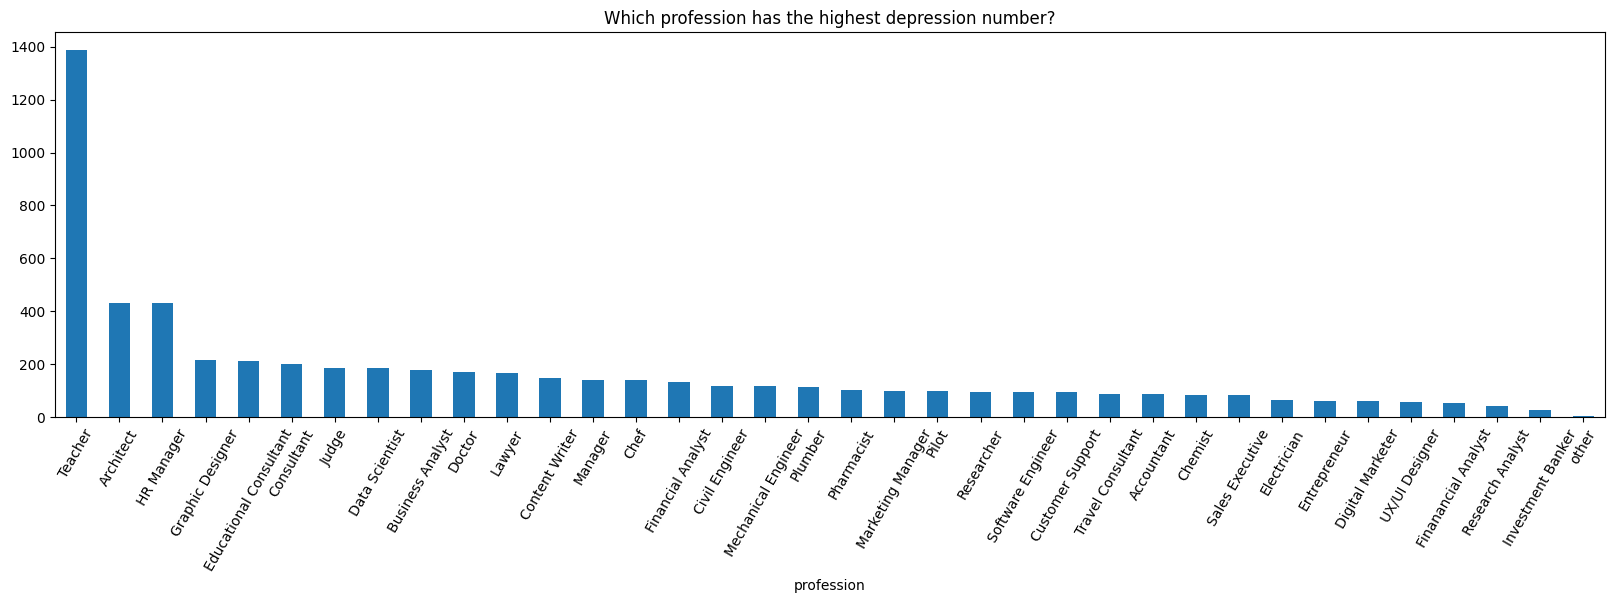

In [26]:
plt.figure(figsize=FIG_SIZE)
train_new.query("depression == 1")["profession"].value_counts().plot(kind='bar')
plt.xticks(rotation=60)
plt.title("Which profession has the highest depression number?")
plt.show()

# plot the depression distribution between students and workers

In [71]:
train_new.groupby(["depression", "job"]).count()[["id"]]

id
depression job                         
0          Student                11565
           Working Professional  103568
1          Student                16336
           Working Professional    9231

In [78]:
(train_new.groupby(["depression", "job"]).count()[["id"]].query("depression == 0")/(103568+11565)).mul(100)

id
depression job                            
0          Student               10.044905
           Working Professional  89.955095

In [79]:
(train_new.groupby(["depression", "job"]).count()[["id"]].query("depression == 1")/(16336+9231)).mul(100)

id
depression job                            
1          Student               63.894864
           Working Professional  36.105136

In [83]:
train_new.groupby(["depression"]).count()[["id"]]

,id
depression,
0,115133
1,25567


In [84]:
train_new.groupby(["depression"]).count()[["id"]]/train_new.shape[0]

,id
depression,
0,0.818287
1,0.181713


In [51]:
train_new.query("depression == 1")

,id,name,gender,age,city,job,profession,academic_pressure,work_pressure,cgpa,study_satisfaction,job_satisfaction,sleep_duration,diet,degree,has_suicidal_thoughts,work_study_hours,financial_stress,family_history_of_mental_illness,depression
1,1,Vivan,Male,26.0,Varanasi,Working Professional,Teacher,NaN,4.0,NaN,NaN,3.0,Less than 5 hours,Unhealthy,LLB,Yes,7.0,3.0,No,1
2,2,Yuvraj,Male,33.0,Visakhapatnam,Student,NaN,5.0,NaN,8.97,2.0,NaN,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
3,3,Yuvraj,Male,22.0,Mumbai,Working Professional,Teacher,NaN,5.0,NaN,NaN,1.0,Less than 5 hours,Moderate,BBA,Yes,10.0,1.0,Yes,1
15,15,Aditi,Female,23.0,Patna,Working Professional,Marketing Manager,NaN,2.0,NaN,NaN,2.0,5-6 hours,Healthy,MA,Yes,6.0,4.0,Yes,1
27,27,Aarav,Male,50.0,Ghaziabad,Working Professional,HR Manager,NaN,5.0,NaN,NaN,3.0,Less than 5 hours,Healthy,MA,Yes,12.0,5.0,Yes,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140666,140666,Abhishek,Male,18.0,Vadodara,Working Professional,NaN,NaN,5.0,NaN,NaN,4.0,Less than 5 hours,Moderate,Class 12,No,2.0,5.0,No,1
140667,140667,Kashish,Female,19.0,Rajkot,Working Professional,NaN,NaN,4.0,NaN,NaN,2.0,More than 8 hours,Unhealthy,MHM,Yes,12.0,4.0,Yes,1
140690,140690,Rashi,Female,18.0,Ludhiana,Student,NaN,5.0,NaN,6.88,2.0,NaN,Less than 5 hours,Healthy,Class 12,Yes,10.0,5.0,No,1
140695,140695,Vidya,Female,18.0,Ahmedabad,Working Professional,NaN,NaN,5.0,NaN,NaN,4.0,5-6 hours,Unhealthy,Class 12,No,2.0,4.0,Yes,1


In [64]:
train_new.query("depression == 1").groupby(["job", "profession"]).count()

id  name  ...  family_history_of_mental_illness  depression
job                  profession                          ...                                              
Student              Architect                  7     7  ...                                 7           7
                     Chef                       2     2  ...                                 2           2
                     Civil Engineer             1     1  ...                                 1           1
                     Content Writer             2     2  ...                                 2           2
                     Digital Marketer           2     2  ...                                 2           2
                     Doctor                     2     2  ...                                 2           2
                     Educational Consultant     1     1  ...                                 1           1
                     Entrepreneur               1     1  ...                                 1           1
                     Lawyer                     1     1  ...                                 1           1
                     Manager                    1     1  ...                                 1           1
                     Pharmacist                 2     2  ...                                 2           2
                     Teacher                    5     5  ...                                 5           5
                     UX/UI Designer             1     1  ...                                 1           1
Working Professional Accountant                86    86  ...                                86          86
                     Architect                426   426  ...                               426         426
                     Business Analyst         179   179  ...                               179         179
                     Chef                     137   137  ...                               137         137
                     Chemist                   84    84  ...                                84          84
                     Civil Engineer           118   118  ...                               118         118
                     Consultant               199   199  ...                               199         199
                     Content Writer           144   144  ...                               144         144
                     Customer Support          93    93  ...                                93          93
                     Data Scientist           186   186  ...                               186         186
                     Digital Marketer          60    60  ...                                60          60
                     Doctor                   170   170  ...                               170         170
                     Educational Consultant   212   212  ...                               212         212
                     Electrician               66    66  ...                                66          66
                     Entrepreneur              61    61  ...                                61          61
                     Finanancial Analyst       55    55  ...                                55          55
                     Financial Analyst        131   131  ...                               131         131
                     Graphic Designer         216   216  ...                               216         216
                     HR Manager               430   430  ...                               430         430
                     Investment Banker         28    28  ...                                28          28
                     Judge                    186   186  ...                               186         186
                     Lawyer                   165   165  ...                               165         165
                     Manager                  141   141  ...                            

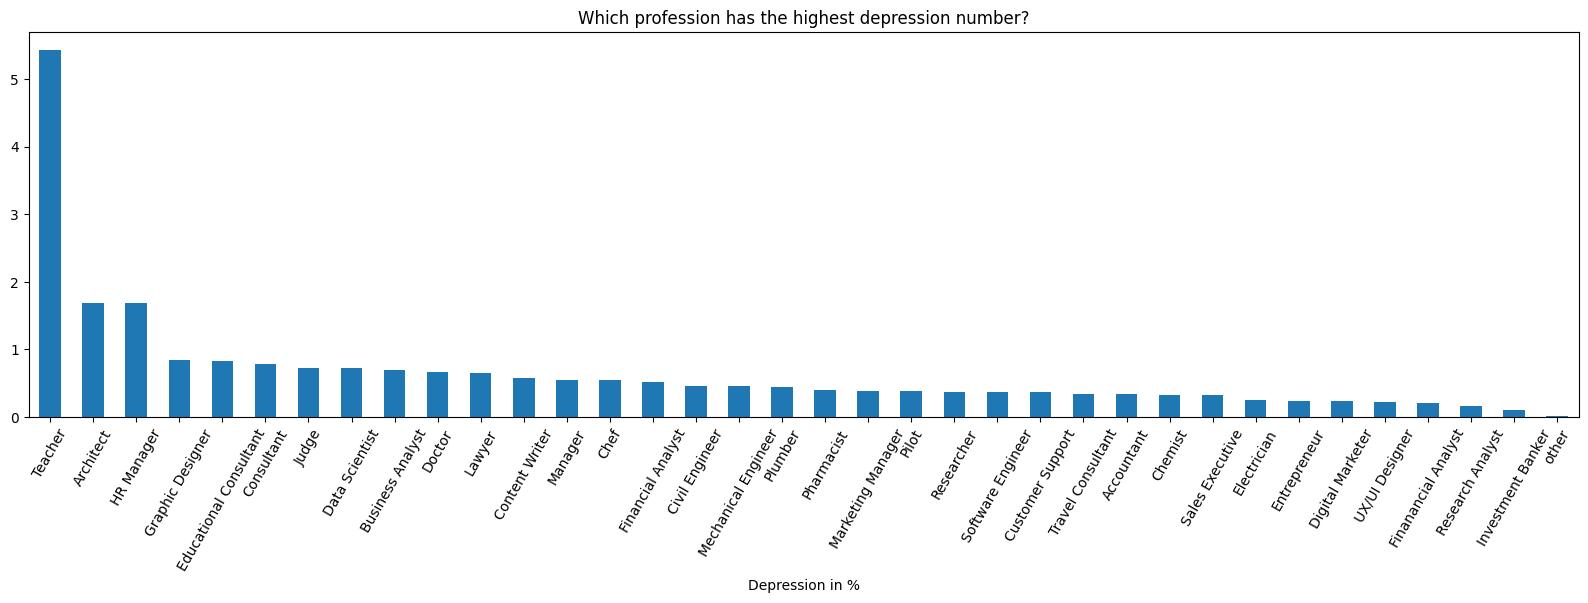

In [31]:
plt.figure(figsize=FIG_SIZE)
train_new.query("depression == 1")["profession"].value_counts().div(train_new.query("depression == 1").shape[0]).mul(100).plot(kind='bar')
plt.xlabel("Depression in %")
plt.xticks(rotation=60)
plt.title("Which profession has the highest depression number?")
plt.show()

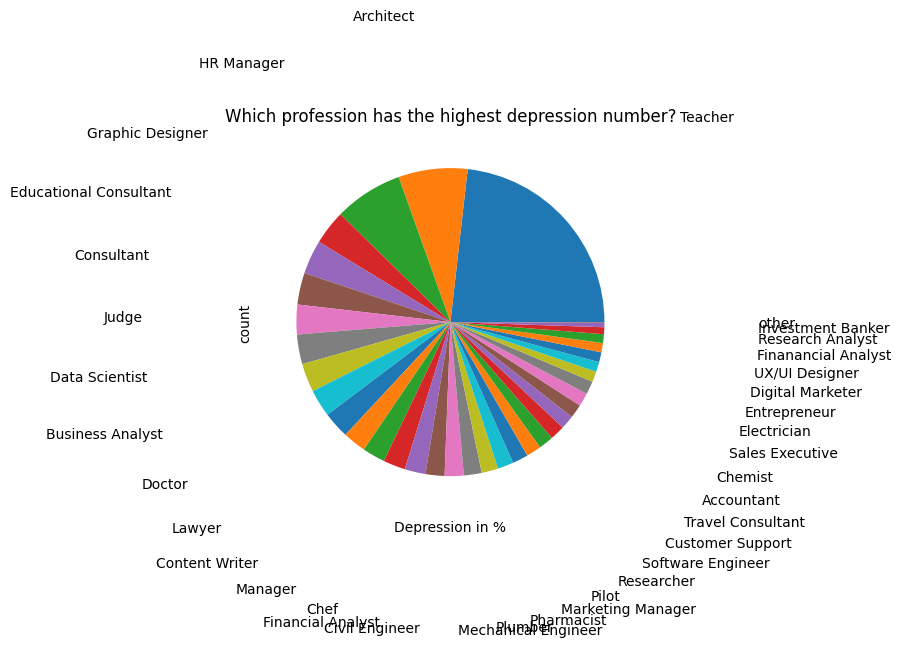

In [47]:
plt.figure(figsize=FIG_SIZE)
train_new.query("depression == 1")["profession"].value_counts().div(train_new.query("depression == 1").shape[0]).mul(100).plot(kind='pie', labeldistance=2)
plt.xlabel("Depression in %")
#plt.xticks(rotation=)
plt.title("Which profession has the highest depression number?")
plt.show()

In [ ]:
plt.pie

# Is a high working hour related to financial stress?
- for students vs. workers